### Einführung in Jupyter Notebooks

Ein Jupyter Notebook ist in sogenannte Zellen unterteilt, die entweder **Code** oder **Text** enthalten können. Diese Zellen sind der Hauptbestandteil des Notebooks und ermöglichen es dir, interaktiv zu arbeiten.

### Aufbau eines Notebooks

Ein typisches Jupyter Notebook enthält:
- **Code-Zellen:** Hier schreibst du Python-Code oder andere unterstützte Programmiersprachen. Der Code wird ausgeführt, und die Ergebnisse werden direkt darunter angezeigt.
- **Markdown-Zellen:** Diese werden genutzt, um Text, Überschriften, Listen oder Tabellen zu erstellen und dienen der Dokumentation.

Oben im Browser-Fenster befindet sich die Toolbar. Dort kannst du den Typ einer Zelle ändern, Zellen ausführen oder den Kernel (die Recheninstanz) steuern.  

### Zellen ausführen

Um eine Zelle auszuführen, klicke sie an und drücke:

- **Shift + Enter**, um die aktuelle Zelle auszuführen und zur nächsten zu springen.
- **Ctrl + Enter**, um die Zelle auszuführen und in der aktuellen Zelle zu bleiben.

Beim Ausführen einer **Code-Zelle** siehst du die Ausgabe (zum Beispiel Ergebnisse von Berechnungen oder Text), direkt unter der Zelle. Bei einer **Markdown-Zelle** wird der Text formatiert angezeigt.

### Wie kann ich dieses Notebook nutzen?

Klicken Sie auf den folgenden Button, um dieses Notebook in [Google Colab](https://colab.research.google.com) nutzen zu können:

<p align="left">
    <a target="_blank" href="https://colab.research.google.com/github/JR-1991/WissMethI-Database/blob/master/tutorials/PythonExample.ipynb">
      <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
    </a>
</p>

Das war's auch schon! Viel Spaß beim Ausprobieren. 😊

In [ ]:
# Führen Sie diese Zelle aus, um die notwendigen Pakete zu installieren.

!pip install mysql-connector-python pandas seaborn

In [106]:
# Führen Sie diese Zelle aus, um die notwendigen Pakete zu nutzen.

import rich
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

### Helper-Funktionen

Die folgende Zelle können Sie ignorieren. Sie dient dazu, Funktionen bereitzustellen, die Ihnen bei der Ausführung Ihrer Abfragen und der Visualisierung Ihrer Ergebnisse helfen. 

#### **Beschreibung der Helper-Funktionen**

1. **`query_database`**  
   Diese Funktion führt eine SQL-Abfrage aus und gibt die Ergebnisse in einem übersichtlichen Pandas DataFrame zurück.  
   - **Eingaben:** Die SQL-Abfrage (`query`) und die Datenbankverbindung (`connection`).
   - **Ausgabe:** Die Ergebnisse der Abfrage als `pd.DataFrame`.
   - **Nutzen:** Ermöglicht es Ihnen, Daten direkt aus einer Datenbank abzurufen und anzuzeigen.

2. **`plot`**  
   Diese Funktion erstellt ein Streudiagramm basierend auf den angegebenen Daten und Achsen.  
   - **Eingaben:** 
     - Das DataFrame (`df`) mit den Daten. 
     - Der Diagrammtitel (`title`) und die Spaltennamen für die Achsen (`x` und `y`). 
     - Beschriftungen für die Achsen (`x_label`, `y_label`). 
     - Optional: Logarithmische Skalierung für beide Achsen (`loglog`).
   - **Ausgabe:** Kein Rückgabewert, aber das Diagramm wird direkt angezeigt.
   - **Nutzen:** Hilft bei der Visualisierung von Abfrageergebnissen.

In [111]:
def query_database(query: str, connection) -> pd.DataFrame:
    """
    Führt eine SQL-Abfrage aus und gibt die Ergebnisse als Pandas DataFrame zurück.

    Args:
        query (str): Die SQL-Abfrage, die ausgeführt werden soll.
        connection: Die Datenbankverbindung, die für die Abfrage verwendet wird.

    Returns:
        pd.DataFrame: Die Ergebnisse der SQL-Abfrage.
    """
    res = pd.read_sql(query, connection)
    rich.print(res)
    return res


def plot(
    df: pd.DataFrame,
    title: str,
    x: str,
    y: str,
    x_label: str,
    y_label: str,
    loglog: bool = False,
):
    """
    Erstellt ein Streudiagramm mit den angegebenen Daten und Achsentiteln.

    Args:
        df (pd.DataFrame): Das DataFrame, das die Daten enthält.
        title (str): Der Titel des Diagramms.
        x (str): Die Spalte für die x-Achse.
        y (str): Die Spalte für die y-Achse.
        x_label (str): Der Beschriftungstext der x-Achse.
        y_label (str): Der Beschriftungstext der y-Achse.
        loglog (bool, optional): Gibt an, ob eine logarithmische Skalierung für beide Achsen verwendet werden soll. Standard ist False.

    Returns:
        None
    """
    f = sns.scatterplot(data=df, x=x, y=y)
    f.set_title(title)
    f.set_xlabel(x_label)
    f.set_ylabel(y_label)
    f.grid(True, linestyle=":", alpha=0.5)

    if loglog:
        f.set(xscale="log", yscale="log")

    sns.despine()

## Ausführung der Übung

Sie können die folgenden Zellen beliebig oft anpassen und ausführen. Experimentieren Sie nach Belieben und entdecken Sie die Möglichkeiten!

### Verbindung zur Datenbank

In dieser Zelle stellen Sie eine Verbindung zur Datenbank her. Nutzen Sie dazu bitte die im ILIAS-Kurs zur Verfügung gestellten Daten zum Verbinden. Dazu editieren Sie die entsprechenden Argumente innerhalb der `connect`-Funktion und führen die Zelle mittels des "Play" Button aus.

In [108]:
# Verbindung zur MySQL-Datenbank herstellen
db_connection = mysql.connector.connect(
    host="127.0.0.1",
    user="user",
    port=3307,
    password="supersecurepassword",
    database="mixtures"
)

### Ausführen der Abfrage

Geben Sie Ihren SQL-Befehl in die entsprechende Zelle ein und führen Sie diese über das **"Play"-Symbol** oder mit **Shift + Enter** aus. Das Ergebnis Ihrer Abfrage wird automatisch angezeigt und in der Variable `data` gespeichert. 

Um die Aufgabe zu lösen, müssen Sie lediglich den SQL-Befehl anpassen. Zusätzliche Schritte oder Programmierung in Python sind nicht erforderlich.

In [109]:
query = """
SELECT temperature, density FROM density LIMIT 10
"""

data = query_database(query, db_connection)

temperature  density
0       298.15   1.1558
1       298.15   1.1920
2       298.15   1.2030
3       303.15   1.1535
4       303.15   1.1895
5       303.15   1.2002
6       308.15   1.1506
7       308.15   1.1867
8       308.15   1.1976
9       313.15   1.1483

### Visualisierung

Im Folgenden können Sie die erhaltenen Daten visualisieren. Passen Sie die Argumente der Visualisierungsfunktion entsprechend an. 

- Mit den Parametern `x` und `y` steuern Sie, **welche** Spalten der Daten genutzt werden. Die Spaltennamen können Sie der Ausgabe der vorherigen Zelle entnehmen.
- Die Achsenbeschriftungen können Sie mit `x_label` und `y_label` individuell anpassen.
- Es ist **wichtig**, dass Sie die Daten mit `df=data` korrekt übergeben, da sonst keine Visualisierung erstellt wird.

Um Ihren Plot zu speichern, klicken Sie mit der rechten Maustaste auf die Grafik und wählen Sie **"Bild speichern unter"** (auf macOS oder vergleichbaren Betriebssystemen). So können Sie die Visualisierung lokal herunterladen.

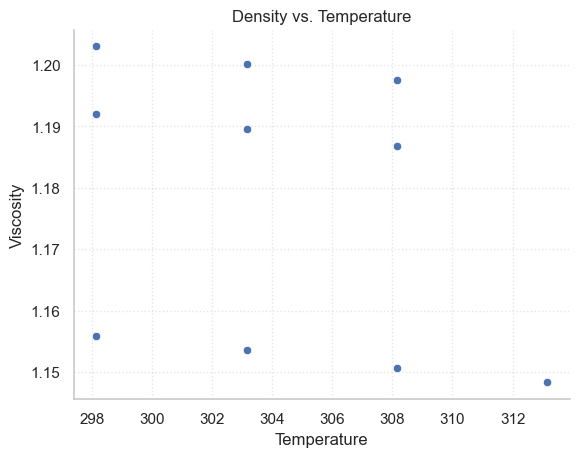

In [105]:
f = plot(
    df=data,
    title="Density vs. Temperature",
    x="temperature",
    y="density",
    x_label="Temperature",
    y_label="Viscosity",
    loglog=False # Auf 'True' setzen für Log-Log Plot
)